# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

#### Description of fnlwgt (final weight):

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


## Requirement

The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_census=pd.read_csv("census income.csv")
df_census.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
15676,48,Private,130812,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
17385,21,Private,83580,Some-college,10,Never-married,Prof-specialty,Own-child,Amer-Indian-Eskimo,Female,0,0,4,United-States,<=50K
1952,21,Private,165475,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
23184,26,Private,67257,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,<=50K
28331,43,Private,245317,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
16266,35,Federal-gov,185053,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
28872,36,Private,129263,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
19581,24,Private,204172,Bachelors,13,Never-married,Sales,Other-relative,White,Female,0,0,40,United-States,<=50K
29467,43,Local-gov,180407,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,42,Germany,<=50K
9431,64,Private,66634,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_census.shape

(32560, 15)

Obs- 
* We can see its a huge dataset with 32,560 rows
* And there are 15 columns of which 14 are input, and the output will be finding Income and then classifying it as whether it is >50 K or not

In [4]:
# Checking data types of attributes
df_census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Obs- We can see the dataset contains both numerical and categorical data.

Columns 'WorkClass','Education','Marital_status', 'Occupation','Relationship','Race','Sex','Native_country','Income' are categorical
While, 'Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week' are Continuous type

In [5]:
# Checking for null values if any
df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Obs- There are no null values in the dataset

In [6]:
# Looking into the dataset, we can observe '?' mark in 'Workclass', Occupation' field, which infact refers to Null Data, Looking for those entries in other columns as well
(df_census==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Obs- 
* We can see columns 'Workclass','Occupation','Native_Country' contains a lot of missing data in form of '?'
* we have around  1843 '?' mark entries, which is nearly just 6% of data, so we will be filling those values , rather than deleting those rows
* We will be filling those rows with mode value as all 3 columns are categorical columns

In [7]:
# Finding frequently occuring value of 'Workclass'
df_census['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [8]:
# Finding frequently occuring value of 'Occupation'
df_census['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [9]:
# Finding frequently occuring value of 'Native_Country'
df_census['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [10]:
# Filling row values of these columns with their respective mode values
df_census['Workclass'] = df_census.Workclass.str.replace('?', 'Private')
df_census['Occupation'] = df_census.Occupation.str.replace('?', 'Prof-specialty')
df_census['Native_country'] = df_census.Native_country.str.replace('?', 'United-States')

In [11]:
# Checking null values again
df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Obs- 
* We can see ? are replaced with respective mode values an there is no missing data now.

In [12]:
# Checking for white spaces
df_census.loc[0:]==" "

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the data

In [13]:
#Check for duplicate data
df_census.duplicated().sum()

24

Obs- We can see duplicate data is present in the dataset

In [14]:
# let's drop duplicate data

df_census.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Obs- We can see the row count has reduced by 24 count. and the duplicate data is removed

In [15]:
# Checking unique entries 
df_census.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [16]:
#Checking description of dataset
df_census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Obs-
* We can see mean of all the columns is higher than median, and therefore we can say data is right skewed.

* Also we can observe max of all the columns  is exceptionally high than 75%, so we can say outliers are present in the columns

## Visualization

### Univariate Analysis

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


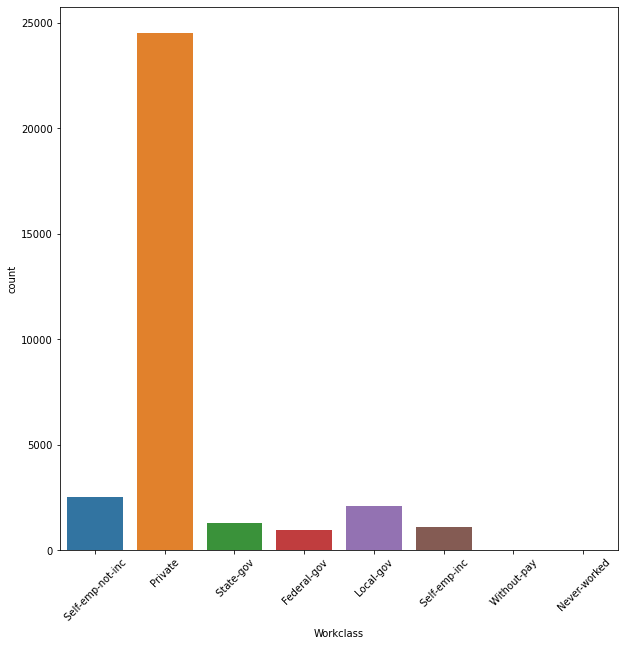

In [17]:
# Count plot to check individual value counts of 'Workclass'
print(df_census['Workclass'].value_counts())

plt.figure(figsize=(10,10))
sns.countplot(df_census['Workclass'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see huge Workclass belongs to 'Private', followed by a very little number of 'Self-emp-not-inc', a very few under 'Local-gov' and a very rare minimum those have aged 16 , have never worked  

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


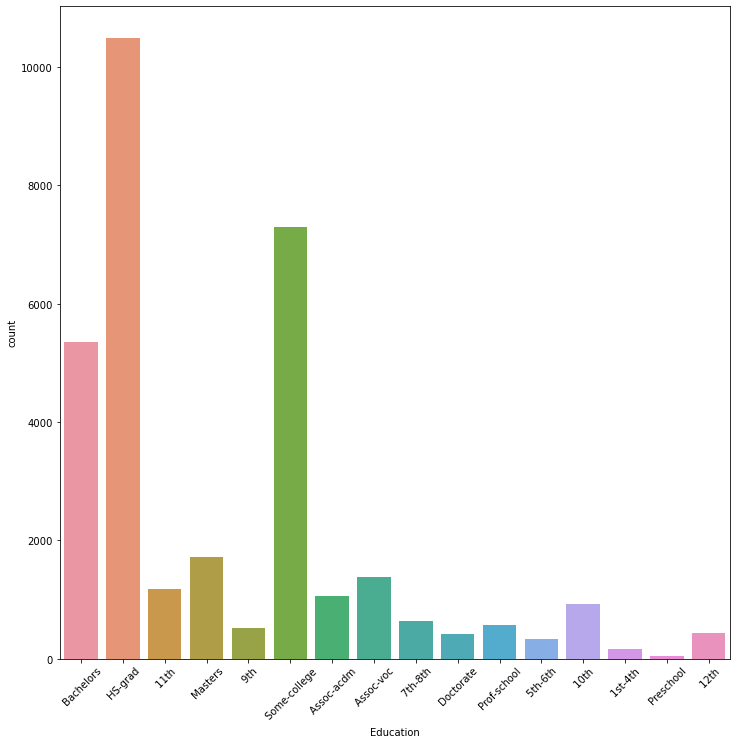

In [18]:
# Count plot to check individual value counts of 'Education'
print(df_census['Education'].value_counts())

plt.figure(figsize=(12,12))
sns.countplot(df_census['Education'])
plt.xticks(rotation=45)
plt.show()

Obs- 
* The max of population have completed 'HS-grad' and have attended 'some-college' 
* Half of the population have done their 'Bachelors' , few who have even completed rheir 'Masters', and a quite few those have completed 'Doctorate'. 
* A few exceptions are those that have just completed 'Preschool' or jus '1st-4th' and '7th-8th'

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


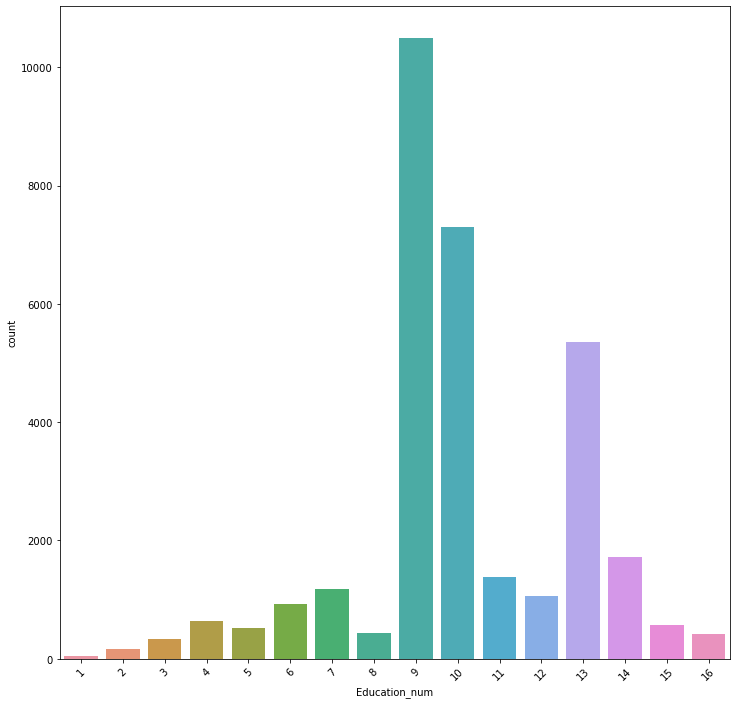

In [19]:
# Count plot to check individual value counts of 'Education_num'
print(df_census['Education_num'].value_counts())

plt.figure(figsize=(12,12))
sns.countplot(df_census['Education_num'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see Education_num is highest for '9' and '10' and the least for '1'

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


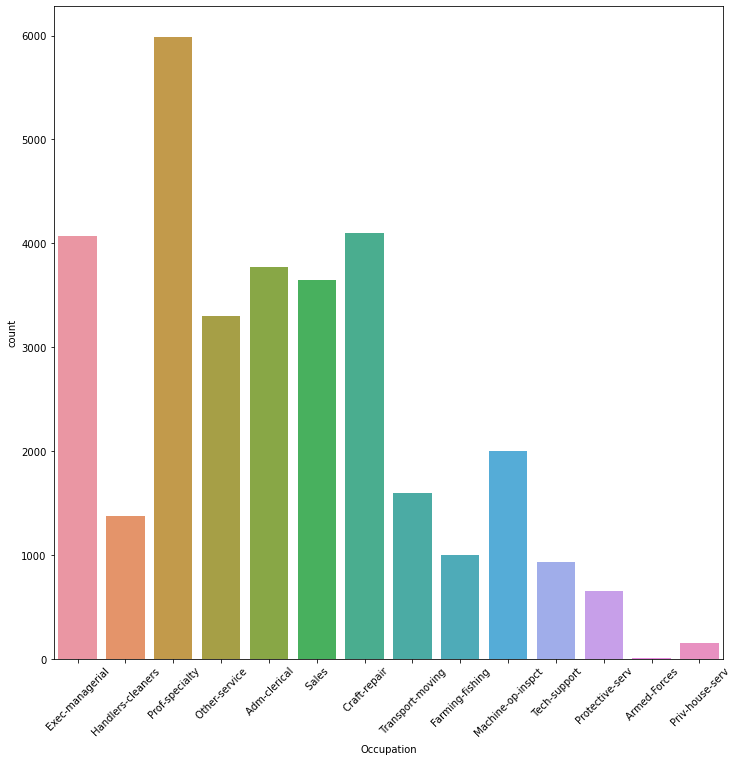

In [20]:
# Count plot to check individual value counts of 'Occupation'
print(df_census['Occupation'].value_counts())

plt.figure(figsize=(12,12))
sns.countplot(df_census['Occupation'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the highest no of people work in 'Prof-speciality', followed by  'Craft-repair','Exec-managerial' and the lowest in 'Armed-forces'

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


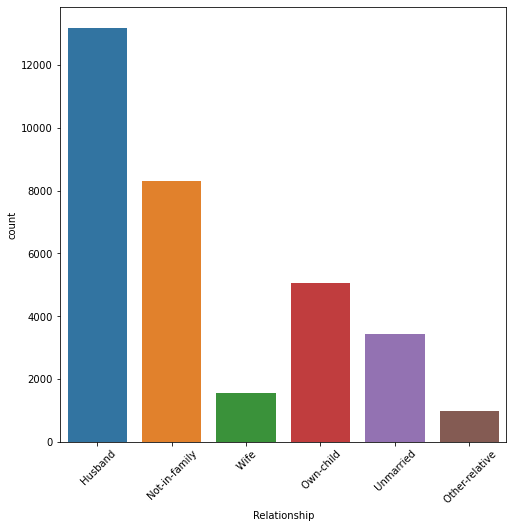

In [21]:
# Count plot to check individual value counts of 'Relationship'
print(df_census['Relationship'].value_counts())

plt.figure(figsize=(8,8))
sns.countplot(df_census['Relationship'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see maximum people holds the relationship of 'Husband'(Which indirectly shows there would be more 'Male' workers), followed by those who prefer living 'Isolated'(Not-in-family)

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


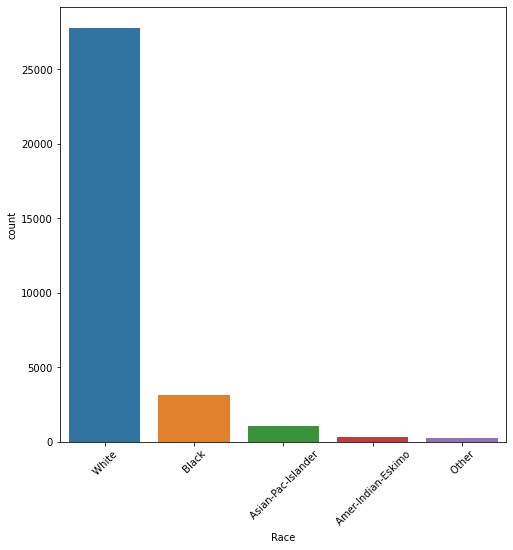

In [22]:
# Count plot to check individual value counts of 'Race'
print(df_census['Race'].value_counts())

plt.figure(figsize=(8,8))
sns.countplot(df_census['Race'])
plt.xticks(rotation=45)
plt.show()

Obs- The dataset contains entries of maximum 'White' Race followed by a very little number of 'Black', then 'Asian-pac-islander' and then 'Amer-Indian-Eskimo' and a few others too

 Male      21789
 Female    10771
Name: Sex, dtype: int64


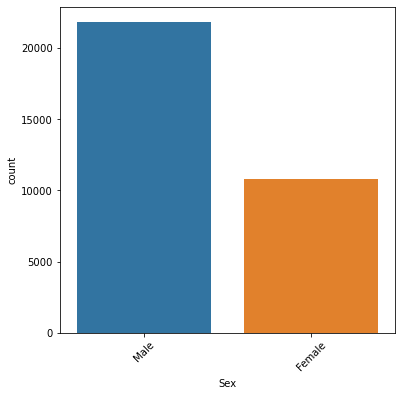

In [23]:
# Count plot to check individual value counts of 'Sex'
print(df_census['Sex'].value_counts())

plt.figure(figsize=(6,6))
sns.countplot(df_census['Sex'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see 'Male' employees count more than double than of the 'Female'  count

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


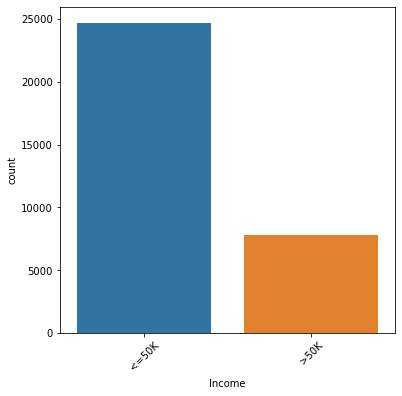

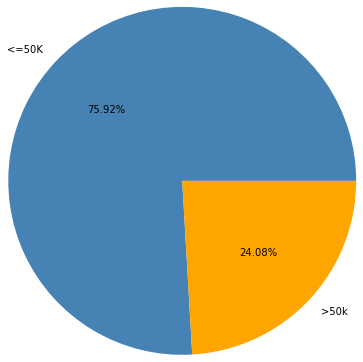

In [24]:
# Count plot to check individual value counts of 'Income(Target)'
print(df_census['Income'].value_counts())

plt.figure(figsize=(6,6))
sns.countplot(df_census['Income'])
plt.xticks(rotation=45)
fig, ax = plt.subplots()
ax.pie(df_census['Income'].value_counts(),labels = ['<=50K','>50k'], radius=2,autopct='%1.2f%%',colors=['steelblue','orange'])
plt.show()

Obs- We can see nearly 76 % of population earn <=50 k and 24% who earn more than 50k

<AxesSubplot:xlabel='Age'>

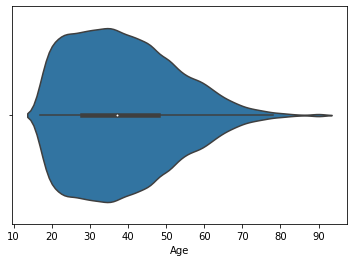

In [25]:
# Violin plot to check distribution of working-population's Age
sns.violinplot(df_census['Age'])

Obs- We can clearly see, dataset conatains entries of people those have started earning from age of 15-16, and the mass-population working is in the age range of 25-45, very few who continue to work even after their 70's

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

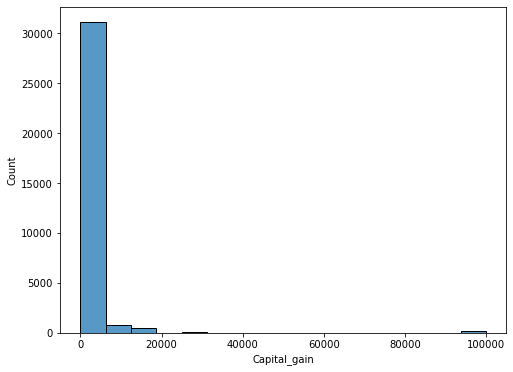

In [26]:
# Histogram to check distribution of working-population's Capital_gain
plt.figure(figsize=(8,6))
sns.histplot(df_census['Capital_gain'])

Obs- We can observe the Capital_gain of most employee corresponds to around 60000-70000, very few whose capital_gain exceeds 150000 and only few whose capital_gain has crossed 950000

<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

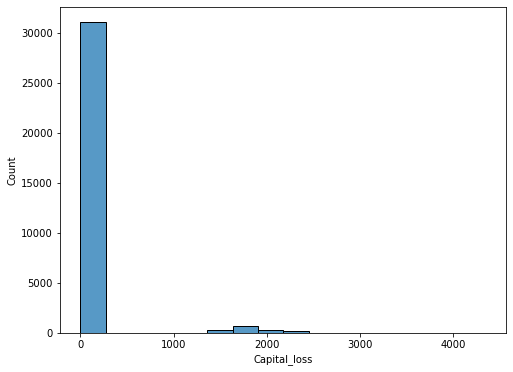

In [27]:
# Histogram to check distribution of working-population's Capital_loss
plt.figure(figsize=(8,6))
sns.histplot(df_census['Capital_loss'])

Obs- We can observe the Capital_loss of most employee corresponds to around 250, very few whose capital_loss exceeds 2500

<AxesSubplot:xlabel='Hours_per_week'>

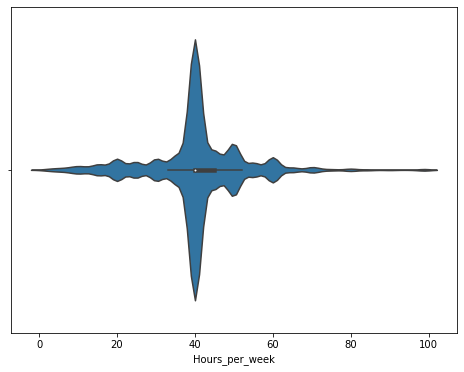

In [28]:
# Violin plot to check distribution of working-population's Hours_per_week
plt.figure(figsize=(8,6))
sns.violinplot(df_census['Hours_per_week'])

Obs- We can onserve max employees work for around 40 hours-per-week(around 8 hrs per day), few of them have to work 30(6hrs a day)/50(10hrs a day) hrs-per-week too, and quite exceptionals those have to work 10 hrs a week(2 hrs a day), and few others fore their reasons have to work more than 70 hrs a week(14 hrs a day) too

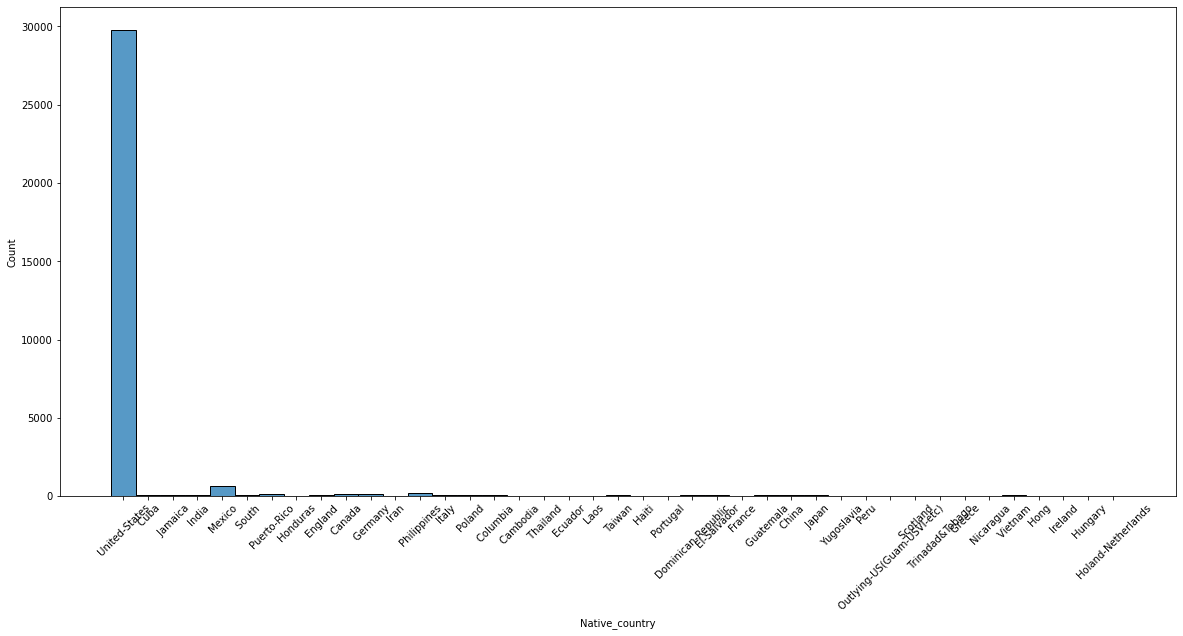

In [29]:
# Violin plot to check distribution of working-population's Age
plt.figure(figsize=(20,9))
sns.histplot(df_census['Native_country'])
plt.xticks(rotation=45)
plt.show()

Obs- As the data is collected at US, the population's native country is 'United States' majorly. The next in row are people whose native-country is 'Mexico', followed by 'Phillippines','Canada','Germany' and a few other countries too. 

In [30]:
# Distribution plot to check skewness in the features

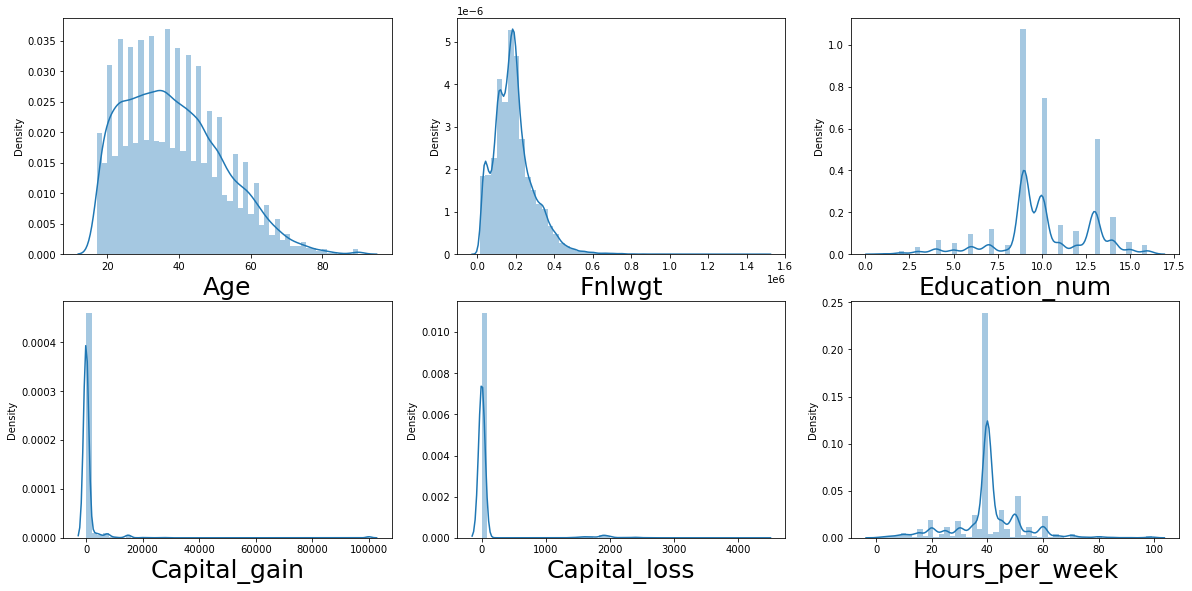

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1

col=['Age','Fnlwgt', 'Education_num', 'Capital_gain','Capital_loss','Hours_per_week']
     
for column in col:
    if plotnumber<=11: #as there are 11 continuous columns 
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_census[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

Obs- We can observe right skewness in all columns and will be treating the skewness later

In [32]:
#box plot to check outliers

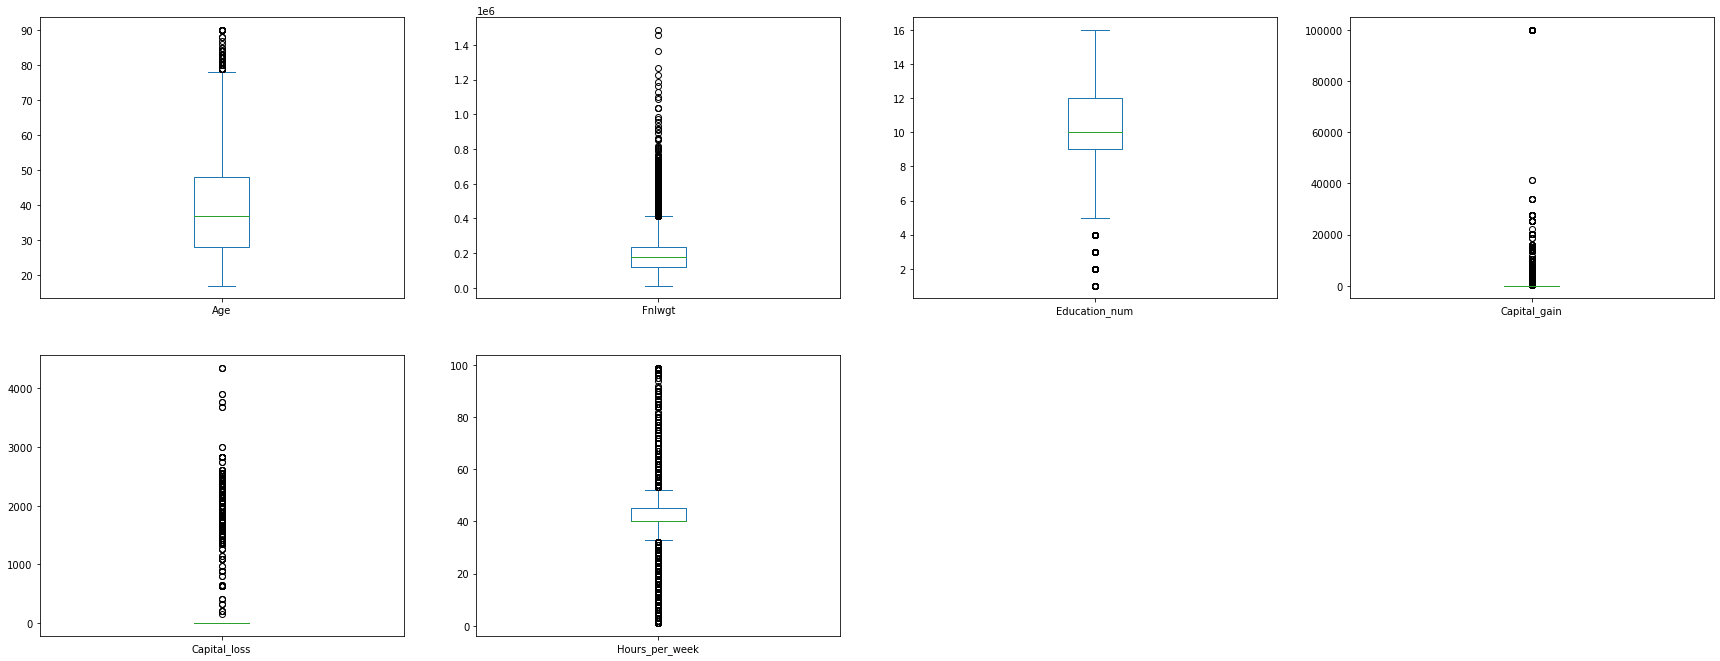

In [33]:
df_census.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see huge number of outliers in all columns, will be removing the outlier-data further

### Bivariate and Multivariate Visualization

In [34]:
# Grouping categorical columns into one
cat_cols = [x for x in df_census.columns if df_census[x].dtypes=='O']
# Grouping numerical columns into one
num_cols = [y for y in df_census.columns if df_census[y].dtypes!='O']

In [35]:
# 'Income(Target)' vs Categorical Data Columns

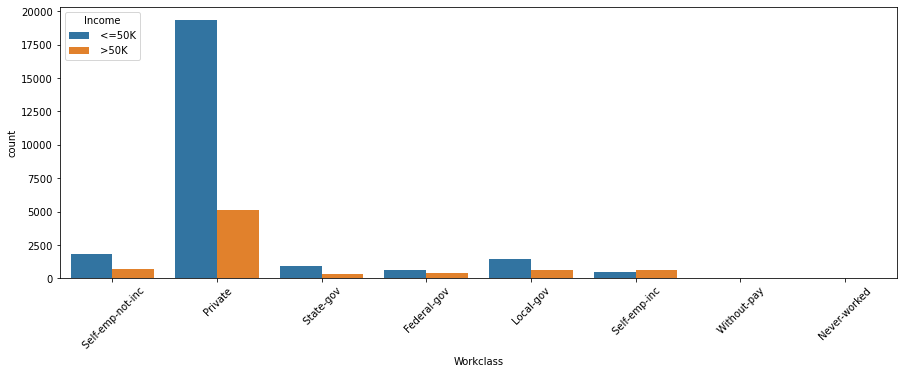

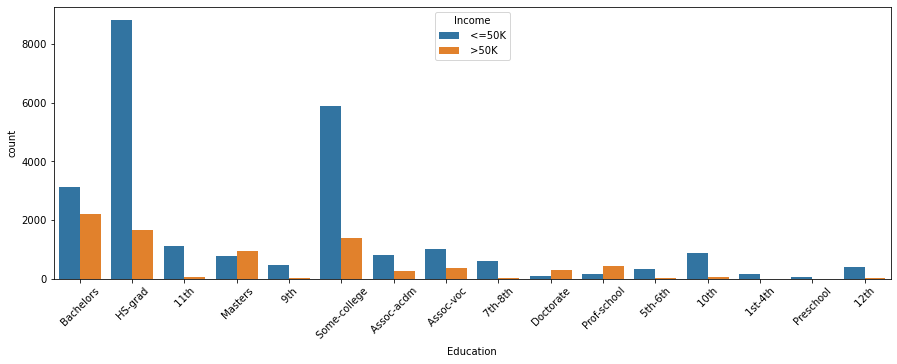

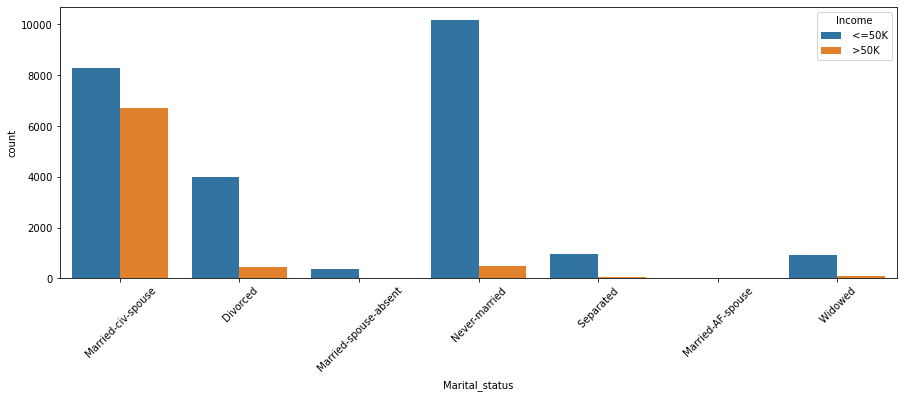

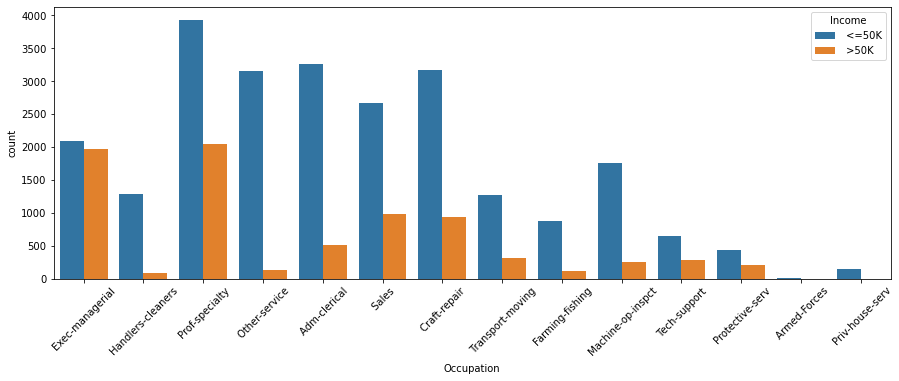

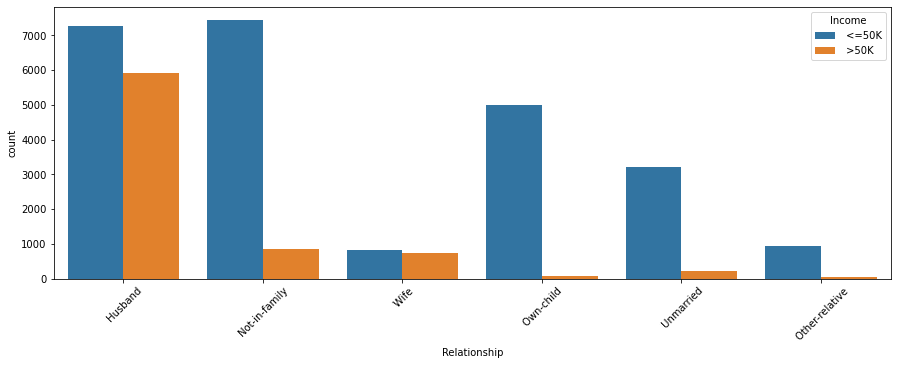

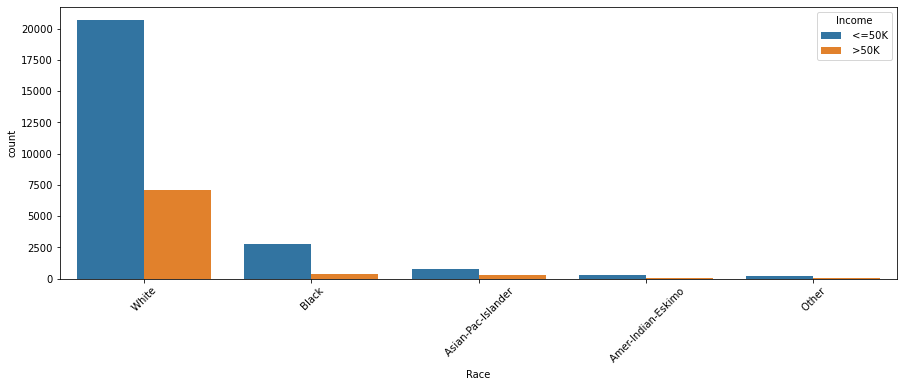

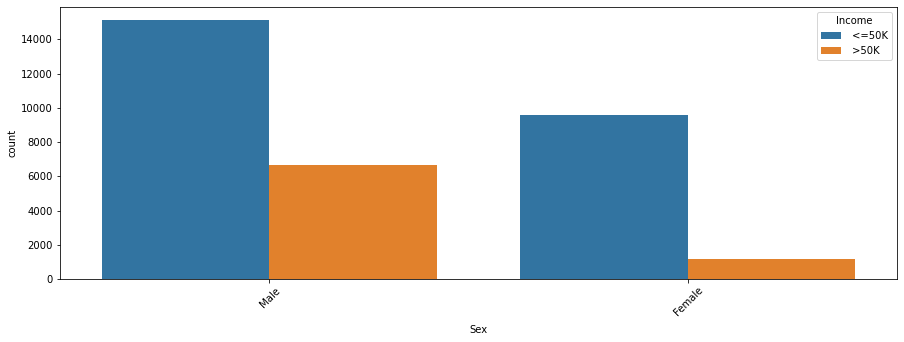

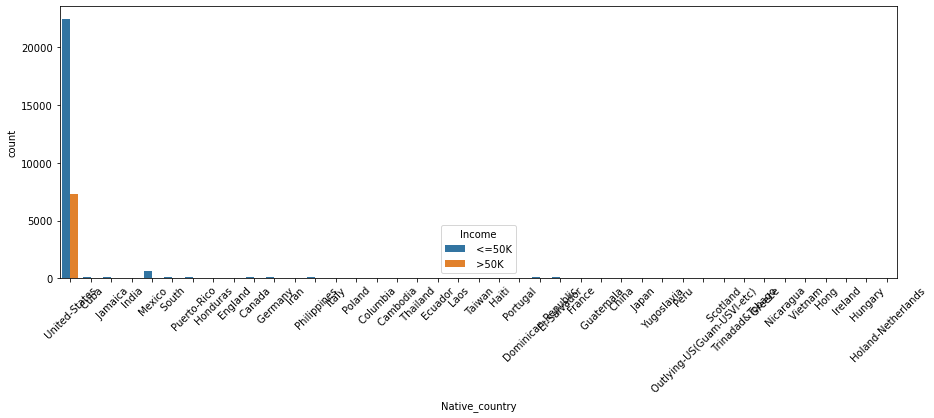

In [36]:
# count plot of the individual categorical features w.r.t. Income

for i in df_census[cat_cols[0:-1]]:  # Excluded Income Column
    plt.figure(figsize=(15,5))
    chart = sns.countplot(x=i,data=df_census,hue='Income')
    plt.xticks(rotation=45)
    plt.show()

Obs- 
* 1. 'Work-Class': If we look into 'Work-Class', we can see the percentage of people earning more than 50K is very less as compared to those who earn more than 50k. While in other work-class it is nearly half.

* 2. 'Education': We can see for people who excel in education (Masters, Doctorate, Professional School), their ratio of earning more than 50k is double than who earn less than 50k.

* 3. 'Marital-Status': A very good percentage of people who are married, have salary more than 50k.

* 4. 'Ocupation': People with occupation Exec-managerial and Prof-specialty have very good number of people who earn more than 50 K, Very few of admin-clericals earn gretaer than 50k, and it is sad to see people eho do Farming or are in Armed forces couldnot earn more than 50k.

* 5. 'Relationship': For a person who holds the title of'Husband'(which shows husbands are more into earning) also see growth leading to salary greater than 50k

* 6. 'Race':We can see even though the population of Black and Asian Pak Islander is far less than Whites, their percentage of earning income more than 50k is more

* Sex- For Males who earn more than 50k is nearly 50% of those who earn less than that , and for females the percentage is just 20%.

* 'Native Country': For United States , we can see people who earn more than 50k is nearly 30% of those who earn less than that

In [37]:
# 'Income(Target)' vs Continuous Data Columns

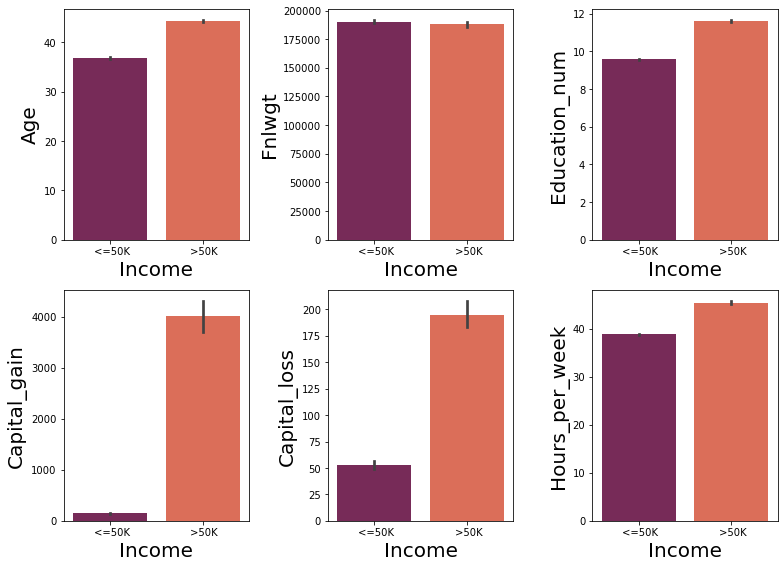

In [38]:
plt.figure(figsize=(11,8),facecolor='white')
plotnum=1
y = df_census['Income']
X = df_census[num_cols]
for col in X:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.barplot(y,X[col], palette='rocket')
        plt.xlabel('Income',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Obs- 
* 1. 'Age': Majority of People under age 35 earn less than 50 k, however people over age 35 have more ratio of those who earn more tha 50k, i.e. with age, income too increases with experience.
* 2. 'Fnlwgt': It has no much impact on Income.
* 3. 'Education_num': People with education no more than 10 are more successful in earning income >50k
* 4. 'Capital_gain': For thsoe whose income is greater than 50k, their capital gain is high.
* 5. 'Captal_loss': For those whose income is greater than 50k, their capital loss is high too
* 6. 'Income': Employees those work more than 40 hours per week , their percentage of earning more than 50k is more   

<AxesSubplot:xlabel='Workclass', ylabel='Capital_gain'>

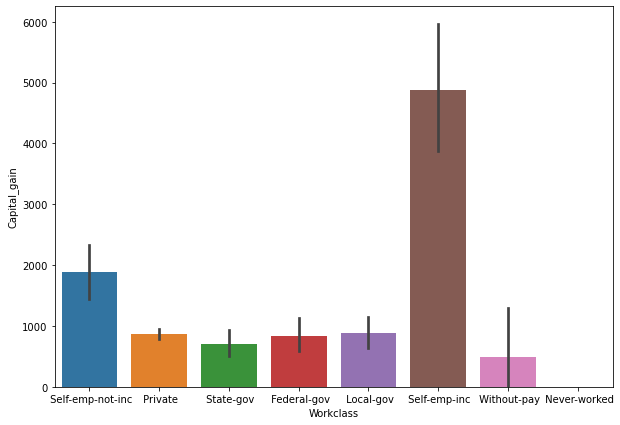

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(y='Capital_gain',data=df_census,x='Workclass')

Obs- We can see Capital-gain for the workclass 'Self_emp-inc'is the highest, followed by 'Self-emp-not-inc' and very low for 'State-gov'

<AxesSubplot:xlabel='Workclass', ylabel='Capital_loss'>

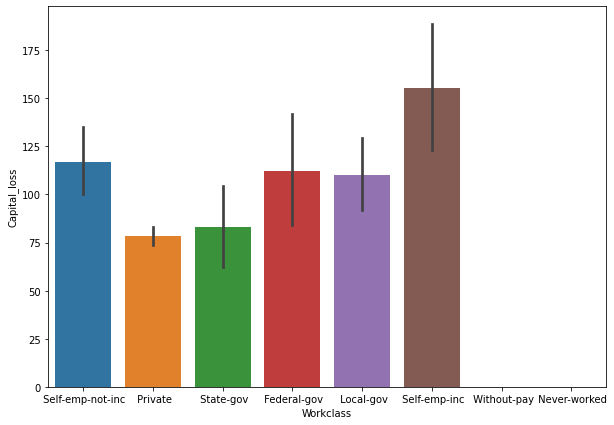

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(y='Capital_loss',data=df_census,x='Workclass')

Obs- We can see even the Capital-loss for the workclass 'Self_emp-inc' is the highest, followed by 'Self-emp-not-inc' and  lowest for 'Private'

## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
for col in df_census[cat_cols]:
    le = LabelEncoder()
    df_census[col] = le.fit_transform(df_census[col])

In [43]:
df_census.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1


In [44]:
df_census.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Obs- We can see all the categorical Columns are encoded,and for target column, 0: income<=50k, and 1: income>50K

## Checking Correlation 

In [45]:
df_census.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

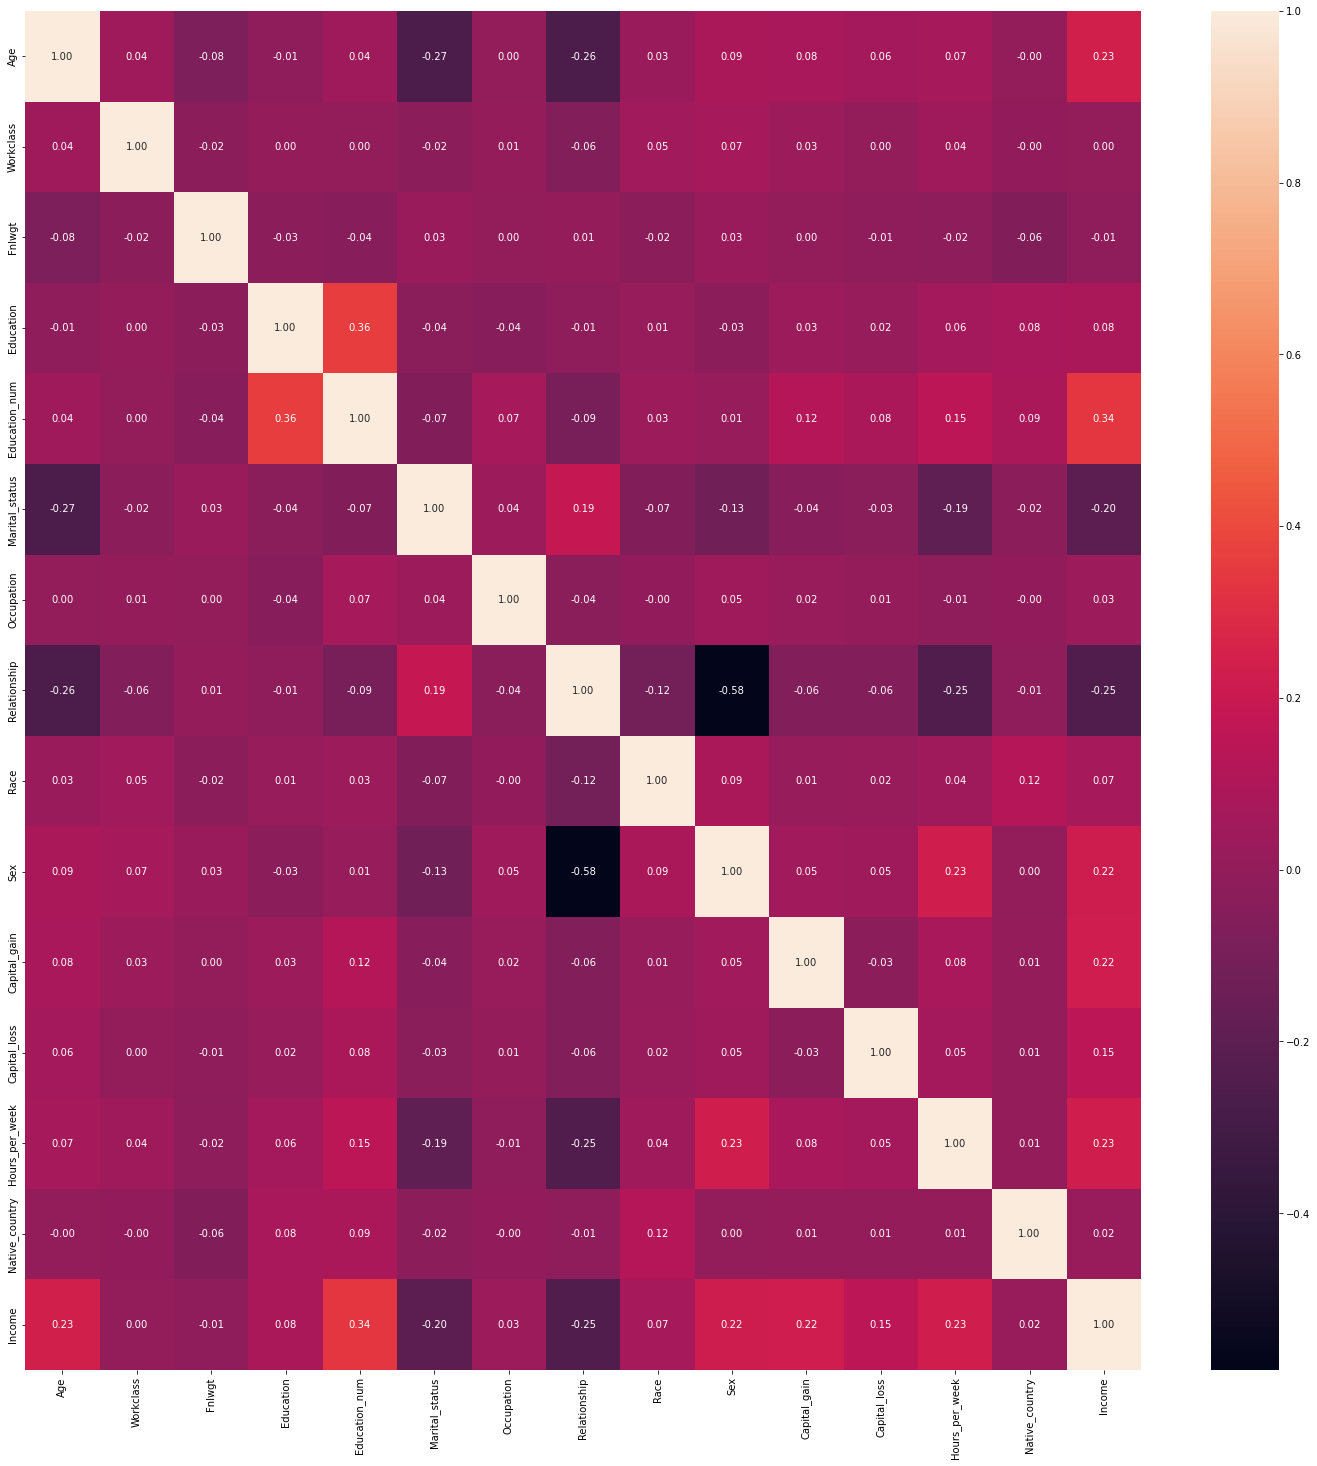

In [46]:
# Correlation using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df_census.corr(),annot=True,fmt='0.2f')

Obs- We can see except for ('Relationship' and 'Sex'(Strong Negarive Correlation)) no two columns have strong correlation beween themselves. And thus we can say multicollinearity is not present.

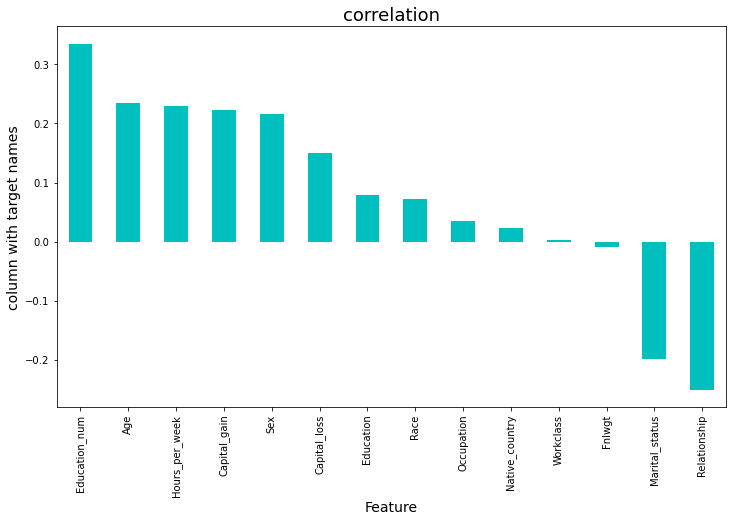

In [47]:
# Correlation of features with Target Column
plt.figure(figsize=(12,7))
df_census.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- We can see none of the columns holds strong correlation with target column

## Detecting Outliers and Treating them

In [48]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_census))
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [49]:
df_census_new=df_census[(z<3).all(axis=1)]

In [50]:
print("df_census.shape:",df_census.shape, "\ndf_census_new.shape:",df_census_new.shape)

df_census.shape: (32560, 15) 
df_census_new.shape: (27770, 15)


In [51]:
# Checking data loss
data_loss=(32560-27770)/32560*100
data_loss

14.71130221130221

In [52]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_census.quantile(0.25)
Q3=df_census.quantile(0.75)
IQR=Q3 - Q1

df_census_new2=df_census[~((df_census < (Q1 - 1.5 * IQR)) |(df_census > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
print("df_census.shape:",df_census.shape, "\ndf_census_new2.shape:",df_census_new2.shape)

df_census.shape: (32560, 15) 
df_census_new2.shape: (8425, 15)


In [54]:
# Checking data loss
data_loss2=(32560-8425)/32560*100
data_loss2

74.12469287469288

Obs- The Data Loss in IQR method is very high, so we will be going with Z-score method

In [55]:
# Reassigning obtained value to original dataframe
df_census=df_census_new
df_census.shape

(27770, 15)

## Model Building

## Seperating Input and Target variables

In [56]:
x=df_census.drop(columns='Income')
y=df_census['Income']

In [57]:
x.shape

(27770, 14)

In [58]:
y.shape

(27770,)

## Data Transformation to treat Skewness

### Checking Skewness

In [59]:
x.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.955755
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.753668
Race              -2.587044
Sex               -0.688946
Capital_gain       4.930671
Capital_loss      29.514547
Hours_per_week    -0.359841
Native_country    -5.405657
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see skewness is present in columns 'Fnlwgt', 'Education', 'Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country' 

### Applying transformation method to treat the skewness

In [60]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Fnlwgt', 'Education', 'Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [61]:
# Rechecking the skewness
x.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt            -0.034492
Education         -0.313492
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.109729
Race              -2.524439
Sex               -0.688946
Capital_gain       3.069288
Capital_loss      24.782637
Hours_per_week    -0.359841
Native_country     1.793856
dtype: float64

Obs- We can see skewness is still present in columns: 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Native_country'.

* Tried applying boxcox method, but it didn't work as all data must be positive for that
* Tried log and sqrt transform also, but both of them were resulting in creating null values
* Therefore, continuing with the obtained transformed values only

## Data Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [63]:
x=pd.DataFrame(data=x_scale)

## Checking for Imbalance 

In [64]:
print(y.value_counts())

0    21544
1     6226
Name: Income, dtype: int64


Obs-We can see the target is imbalanced, and therefore we need to balance it.

### Oversampling using SMOTE

pip install imblearn

In [66]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [67]:
print(y.value_counts())

0    21544
1    21544
Name: Income, dtype: int64


## Classification Model 
(As the target is to determine income >50 K or <=50 k , we will be building Classification Models

In [70]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7843273768082308  on Random_state  16


### Splitting data into Train-Test

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=16)

In [72]:
x_train.shape

(30161, 14)

In [73]:
y_train.shape

(30161,)

In [74]:
x_test.shape

(12927, 14)

In [75]:
y_test.shape

(12927,)

### Using various Machine Learning Algorithms

In [76]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Logistic Regression

In [77]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.7843273768082308
Confusion Matrix:
 [[4912 1490]
 [1298 5227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      6402
           1       0.78      0.80      0.79      6525

    accuracy                           0.78     12927
   macro avg       0.78      0.78      0.78     12927
weighted avg       0.78      0.78      0.78     12927



Obs- The Logistic Regression has provided the accuracy_score:0.7843273768082308 and f1-score:0.78

### 2. GaussianNB

In [78]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7724916840720971
Confusion Matrix:
 [[4478 1924]
 [1017 5508]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75      6402
           1       0.74      0.84      0.79      6525

    accuracy                           0.77     12927
   macro avg       0.78      0.77      0.77     12927
weighted avg       0.78      0.77      0.77     12927



Obs- The GaussianNB has provided the accuracy_score:0.7724916840720971and f1-score:0.75

### 3.Decision Tree Classifier

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8503132977488976
Confusion Matrix:
 [[5450  952]
 [ 983 5542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      6402
           1       0.85      0.85      0.85      6525

    accuracy                           0.85     12927
   macro avg       0.85      0.85      0.85     12927
weighted avg       0.85      0.85      0.85     12927



Obs- The Decision Tree Classifier has provided the accuracy-score:0.8503132977488976 and f1-score:0.85

### 4.K Nearest Neighbor Classifier

In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.8553415332250329
Confusion Matrix:
 [[4944 1458]
 [ 412 6113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      6402
           1       0.81      0.94      0.87      6525

    accuracy                           0.86     12927
   macro avg       0.87      0.85      0.85     12927
weighted avg       0.86      0.86      0.85     12927



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.8553415332250329 and f1-score:0.84

### 5.Support Vector Machine Classifier

In [81]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8307418581264021
Confusion Matrix:
 [[4903 1499]
 [ 689 5836]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      6402
           1       0.80      0.89      0.84      6525

    accuracy                           0.83     12927
   macro avg       0.84      0.83      0.83     12927
weighted avg       0.84      0.83      0.83     12927



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.8307418581264021 and f1-score:0.82

### 6. Ensemble Methods
#### 6.1 Random Forest Classifier

In [82]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.9012145122611588
Confusion Matrix:
 [[5692  710]
 [ 567 5958]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6402
           1       0.89      0.91      0.90      6525

    accuracy                           0.90     12927
   macro avg       0.90      0.90      0.90     12927
weighted avg       0.90      0.90      0.90     12927



Obs- The Random Forest Classifier has provided the accuracy-score:0.9012145122611588 and f1-score:0.90

#### 6.2 Ada Boost Classifier

In [83]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8542585286609422
Confusion Matrix:
 [[5362 1040]
 [ 844 5681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6402
           1       0.85      0.87      0.86      6525

    accuracy                           0.85     12927
   macro avg       0.85      0.85      0.85     12927
weighted avg       0.85      0.85      0.85     12927



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8542585286609422 and f1-score:0.85

#### 6.3 Gradient Boosting Classifier

In [84]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.8689564477450298
Confusion Matrix:
 [[5379 1023]
 [ 671 5854]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      6402
           1       0.85      0.90      0.87      6525

    accuracy                           0.87     12927
   macro avg       0.87      0.87      0.87     12927
weighted avg       0.87      0.87      0.87     12927



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.8689564477450298 and f1-score:0.86

### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

In [87]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(3,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 3
Cross_Validation_score is: 77.68753912798131
Accuracy is : 78.43273768082308


At cv: 4
Cross_Validation_score is: 77.65038989974006
Accuracy is : 78.43273768082308


At cv: 5
Cross_Validation_score is: 77.6364827195471
Accuracy is : 78.43273768082308


At cv: 6
Cross_Validation_score is: 77.67128763074447
Accuracy is : 78.43273768082308


At cv: 7
Cross_Validation_score is: 77.67361848675002
Accuracy is : 78.43273768082308


At cv: 8
Cross_Validation_score is: 77.66895655402897
Accuracy is : 78.43273768082308


At cv: 9
Cross_Validation_score is: 77.6643477761088
Accuracy is : 78.43273768082308


At cv: 10
Cross_Validation_score is: 77.67363304073248
Accuracy is : 78.43273768082308




Obs- Selecting the fold value as 3

In [88]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=3).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.7768753912798131
And Difference between CV and accuracy_score= 0.007451985528417748


In [89]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=3).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.7649230553205233
And Difference between CV and accuracy_score= 0.007568628751573825


In [90]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=3).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.8424626421895405
And Difference between CV and accuracy_score= 0.007850655559357156


In [91]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=3).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.8553426946618091
And Difference between CV and accuracy_score= -1.161436776198066e-06


In [93]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=3).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.8273766371361654
And Difference between CV and accuracy_score= 0.003365220990236728


In [94]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=3).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.894217116204841
And Difference between CV and accuracy_score= 0.006997396056317773


In [95]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=3).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.8444814426625215
And Difference between CV and accuracy_score= 0.009777085998420754


In [96]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=3).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.8572693023044452
And Difference between CV and accuracy_score= 0.011687145440584579


Obs- 
* We can observe the difference between CV score and r2_score is least in the models Suppoer vector classifier(0.003) and random Forest Classifier( 0.006), However we will select Random Forest Classifier as the best model beacuse 1)SVC takes infinite time to provide results and 2) with such minute difference , the output of Random Forest is even better than SVC
* finding best parameters to pass in RF below using hyper parameter tuning

## Hyper Parameter Tuning

In [107]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
#Selecting few parameter list to pass in Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range:

parameter = {'n_estimators':[10,100,150],
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_features':['sqrt', 'log2', 'None'],
             'random_state':[14,35,42,57]}

In [110]:
# Passing this parameters to GridSearchCV
GCV = GridSearchCV(rf,parameter,cv=3,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150, 'random_state': 42}


0.9009050823857043

In [111]:
#Applying best parameter values on Support Vector Classifier Algorithm 
census_best=RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators= 150, random_state= 42)
census_best.fit(x_train,y_train)
predrf1=census_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf1))
print("Classification Report:\n",classification_report(y_test,predrf1))

Accuracy: 0.9009050823857043
Confusion Matrix:
 [[5692  710]
 [ 571 5954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6402
           1       0.89      0.91      0.90      6525

    accuracy                           0.90     12927
   macro avg       0.90      0.90      0.90     12927
weighted avg       0.90      0.90      0.90     12927



Our best model with best parameters has given exceelent accuracy of  0.9009050823857043 and f1_score of 0.90

### Plotting ROC-AUC curve for best model

In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

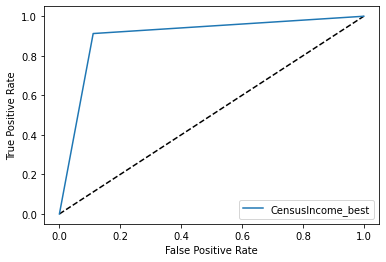

In [113]:
fpr,tpr,threshholds=roc_curve(y_test,predrf1)
auc = roc_auc_score(y_test,predrf1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='CensusIncome_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
Obs- The best model ie. Support Vector Classifier has AUC(area under curve)=  0.90%

## Saving the best model

In [115]:
import joblib

joblib.dump(census_best,'Census.obj')

['Census.obj']

In [116]:
census_model=joblib.load('Census.obj')

In [117]:
census_model

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=150, random_state=42)

## Predicting the Output

In [142]:
ori = np.array(y_test)
predicted = np.array(census_best.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
12922,1,1
12923,0,0
12924,1,1
12925,0,0


Obs- We can see our best model has given majorly the same results as original

Text(0.5, 1.0, 'Original vs predicted  graph')

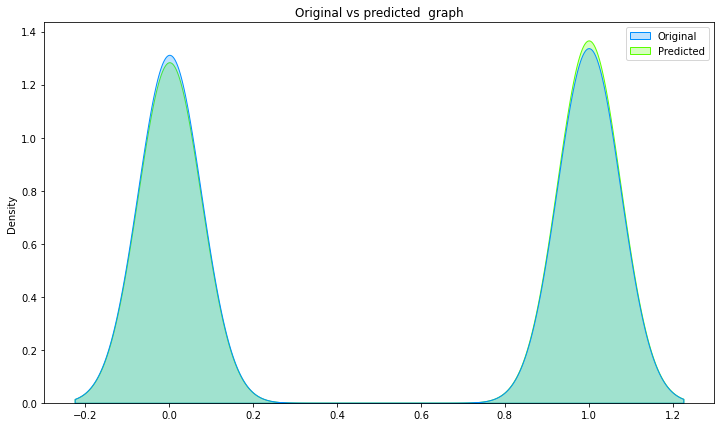

In [143]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- We can observe from the graph of predicted follows almost identical as the original one

## Concluding Remarks

* We have predicted the Income of people by collecting the dataset of people having different-diferent occupation and working experience.
* We classified the output using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Random Forest Classifier model achieved higher prediction accuracy.